In [27]:
import gym
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [28]:
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random
import numpy as np 
from numpy import abs as Abs
from numpy import sign as sign

from control.matlab import *  # MATLAB-like functions
import control as ct
from scipy import signal
 
 
import matplotlib
import matplotlib.pyplot as plt
 
import tensorflow as tf
from gym import Env
from gym.spaces import Discrete, Box
 
import random
 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [29]:
n = 8
r = 3
M = np.load('M.npy')
C = np.load('C.npy')
K = np.load('K.npy')
Ad = np.load('Ad.npy')
Bd = np.load('Bd.npy')
Ed = np.load('Ed.npy')
Cd = np.load('Cd.npy')
Dd = np.load('Dd.npy')
from numpy.linalg import matrix_rank
ko = matrix_rank(ctrb(Ad, Bd))
if ko == len(Ad):
  print("System is controllable")
else:
  print("System is uncontrollable")

System is controllable


In [30]:
# GMdt = np.loadtxt('GMdt.txt', unpack = True)
# print(len(GMdt))
# a = np.random.randint(low=1,high=20)

# if a < 10:
#     f = "la"+"%02d" % a  + ".dat"
# else:
#     f = "la"+"%02d" % a  + ".dat"
# print(f)
# c = (np.array(np.loadtxt(f)).flatten())/100
# print(c)

# # Time series for ground motion
# dt = GMdt[a-1]
# print(dt)
# tend = dt*len(c)
# t = np.arange(0, tend, dt)
# plt.figure()
# plt.plot(t,c)

In [31]:
# Weighting matrices
Q = np.identity(2*n)
# Q = np.zeros([2*n, 2*n])
# Q[0:n, 0:n] = K
# Q[n:2*n, n:2*n] = M
(i,j) = Bd.shape
R =  (10**(-14))*np.identity(j)
del i, j
Kp, Sp, ep = ct.dlqr(Ad, Bd, Q, R)

GMdt = np.loadtxt('GMdt.txt', unpack = True)
#print(len(GMdt))
# Time series analysis
xo = np.zeros((4050,2*n,60))
(i,j) = Cd.shape
yo = np.zeros((4050,i,60))
xp = np.zeros((4050,2*n,60))
(i,j) = Cd.shape
yp = np.zeros((4050,i,60))
J1_val = np.zeros([60, 1])
J2_val = np.zeros([60, 1])
U = np.zeros([4050, r, 60])
del i,j
for i in range(1, 61):
    if i < 10:
        f = "la"+"%02d" % i  + ".dat"
    else:
        f = "la"+"%02d" % i  + ".dat"
    print(f)
    xacc = (np.array(np.loadtxt(f)).flatten())/100
    # Time series for ground motion
    dt = GMdt[i-1]
    print(dt)
    tend = dt*len(xacc)
    t = np.arange(0, tend, dt)
    
    #plt.figure()
    #plt.plot(t,xacc)

    for tkk in range(0,len(t)-10):
        time_current = t[tkk]
        y = (Cd @ np.array([xo[tkk,:,i-1]]).T)
        yo[tkk,:,i-1] = y.T
        x = (Ad @ np.array([xo[tkk,:,i-1]]).T) + (Ed * xacc[tkk])
        xo[tkk+1,:,i-1] = x.T
        y1 = (Cd @ np.array([xp[tkk,:,i-1]]).T) + (Dd @ ((-1*Kp) @ np.array([xp[tkk,:,i-1]]).T))
        yp[tkk,:,i-1] = y1.T
        u = (-1*Kp) @ np.array([xp[tkk,:,i-1]]).T
        #print(u)
        U[tkk, :, i-1] = u.T
        x1 = (Ad @ np.array([xp[tkk,:,i-1]]).T) + (Bd @ ((-1*Kp) @ np.array([xp[tkk,:,i-1]]).T)) + (Ed * xacc[tkk])
        xp[tkk+1,:,i-1] = x1.T
        
        En1 = 0.5*((xo[tkk+1,:,i-1]@Q)@xo[tkk+1,:,i-1].T)
        En2 = 0.5*((xp[tkk+1,:,i-1]@Q)@xp[tkk+1,:,i-1].T)
        J1 = dt*En1
        J2 = dt*En2
        J1_val[i-1] += J1 
        J2_val[i-1] += J2
print(J1_val, J2_val) 

la01.dat
0.02
la02.dat
0.02
la03.dat
0.01
la04.dat
0.01
la05.dat
0.01
la06.dat
0.01
la07.dat
0.02
la08.dat
0.02
la09.dat
0.02
la10.dat
0.02
la11.dat
0.02
la12.dat
0.02
la13.dat
0.02
la14.dat
0.02
la15.dat
0.005
la16.dat
0.005
la17.dat
0.02
la18.dat
0.02
la19.dat
0.02
la20.dat
0.02
la21.dat
0.02
la22.dat
0.02
la23.dat
0.01
la24.dat
0.01
la25.dat
0.005
la26.dat
0.005
la27.dat
0.02
la28.dat
0.02
la29.dat
0.02
la30.dat
0.02
la31.dat
0.01
la32.dat
0.01
la33.dat
0.01
la34.dat
0.01
la35.dat
0.01
la36.dat
0.01
la37.dat
0.02
la38.dat
0.02
la39.dat
0.02
la40.dat
0.02
la41.dat
0.01
la42.dat
0.01
la43.dat
0.01
la44.dat
0.01
la45.dat
0.02
la46.dat
0.02
la47.dat
0.02
la48.dat
0.02
la49.dat
0.02
la50.dat
0.02
la51.dat
0.02
la52.dat
0.02
la53.dat
0.02
la54.dat
0.02
la55.dat
0.02
la56.dat
0.02
la57.dat
0.02
la58.dat
0.02
la59.dat
0.02
la60.dat
0.02
[[28.71037732]
 [ 6.37858409]
 [17.07675988]
 [ 6.61268145]
 [ 3.12221871]
 [ 1.69320463]
 [ 6.13321217]
 [ 2.64835227]
 [20.00203447]
 [ 3.45255559]
 [13.9

In [32]:
xo.shape

(4050, 16, 60)

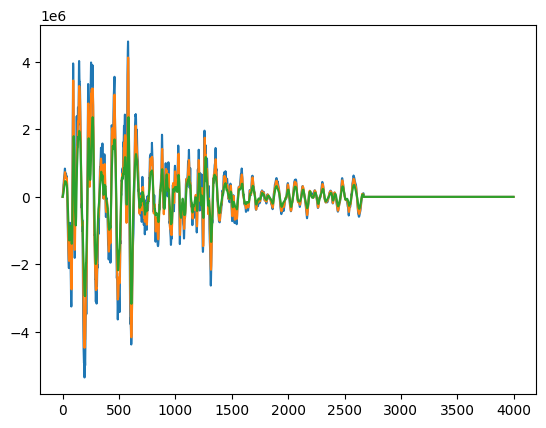

In [6]:
plt.plot(U[:,:,0])

In [7]:
class MrDamperEnv(Env):

    def __init__(self):
      self.n = 8    # Number of storey
      self.r = 3    # no of MR dampers
      # 1000kN MR damper
      self.vmax = 10
      self.vmin = 0
      self.gamma = 141
      self.beta = 141
      self.Ad = 2074.5
      self.nd = 2
      self.eta = 100
      self.alpha0 = 26.0*10**3
      self.alpha1 = 29.1*10**3
      self.c01 = 105.4*10**3
      self.c02 = 131.6*10**3
      self.k01 = 0
      self.k02 = 0
      self.umin = 0.02  
      self.umax = 1 
 
      
      # Plant matrices
      self.M = np.load('M.npy')
      self.C = np.load('C.npy')
      self.K = np.load('K.npy')
      self.A = np.load('Ad.npy')
      self.B = np.load('Bd.npy')
      self.E = np.load('Ed.npy')
      
      # Output matrix (Disp + Accel)
      #self.Cd = np.array([[1, 1, 0, 0], [-self.Ks/self.M, self.Ks/self.M, 0, 0], [self.Ks/self.m, -1*(self.Ks+self.Kt)/self.m, 0, 0]])
      #self.Dd = np.array([[0, 1/self.M, -1/self.m]]).T
      #self.Ed = np.array([[0, 0, 0]]).T
    
      # Weighting matrices
      self.Q = np.identity(2*self.n)
      #self.Q = np.zeros([2*self.n, 2*self.n])
      #self.Q[0:self.n, 0:self.n] = self.K
      #self.Q[self.n:2*self.n, self.n:2*self.n] = self.M
      (i,j) = self.B.shape
      self.R =  (10**(-14))*np.identity(j)
      del i, j
      
        
      # Input per episode
      a = np.random.randint(low=1,high=10)

      if a < 10:
        f = "la"+"%02d" % a  + ".dat"
      else:
        f = "la"+"%02d" % a  + ".dat"
      #print(f)
      self.xacc = (np.array(np.loadtxt(f)).flatten())/100  # Convert cm/s2 to m/s2
      #print(c)
      
      # Time series for ground motion
      GMdt = np.loadtxt('GMdt.txt', unpack = True)
      #print(len(GMdt))
      self.dt = GMdt[a-1]
      #print(self.dt)
      tend = self.dt*len(self.xacc)
      self.t = np.arange(0, tend, self.dt)
      nt = self.t.size
      #plt.figure()
      #plt.plot(self.t, self.xacc)
      del a, f, GMdt, tend
          
      # Initialize variables
      self.time_current = 0
      self.state = np.zeros([nt, 2*self.n]) # states (ys,ysdot,yt,ytdot)
      self.U = np.zeros([nt, self.r]) # Control force (action)
      self.Re = np.zeros([nt, 1]) # Reward
      self.J_val = 0
      self.action_space = Box(low=np.array([-6e6, -6e6, -6e6]), high=np.array([6e6, 6e6, 6e6]),shape=(3,))
      self.observation_space = Box(low=np.array([-100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000]), high=np.array([-100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000]) )
      self.statem = np.zeros([1, 2*self.n])
      self.K = np.zeros([2*self.n, 2*self.n])
      self.Volt = np.zeros([nt, 1])
      self.hr = []

    def step(self, action):
          tim = self.time_current  # current time (size 1)
            
          A = self.A 
          B = self.B
          E = self.E
          Q = self.Q
          R = self.R  
          n = self.n
          r = self.r
          dt = self.dt
          umin = self.umin  
          umax = self.umax
          Kp, Sp, ep = ct.dlqr(A, B, Q, R)
          Bj = B@(-Kp)
            
          # Control action
          K = self.K
          #print(K)
          action1 = np.squeeze(action)
          state = np.array([self.state[tim, :]]).T
          val = ((state.T)@K)@(state)
        
          if(val[0] >= 0):
                action2 = (umin*(-Kp@state)) + np.array([action1]).T
                self.U[tim, :] = np.squeeze(action2.T)    # control force
                self.Volt[tim, :] = umin
          else:
                action2 = (umax*(-Kp@state)) + np.array([action1]).T
                self.U[tim, :] = np.squeeze(action2.T)    # control force
                self.Volt[tim, :] = umax
          del action1, action2
          action1 = np.array([self.U[tim, :]]).T
          #print(action1)
          #print(action)
        
          self.J = 0
          z = 10 + tim
          i = 0
          for tkk in range(tim, z):
            h = self.xacc[tkk] 
            self.hr.append(h)
            xn = state
            #print(xn)
            xn1 = (A @ xn) + (B @ action1) + (E*h)
            state = xn1
            
            self.En = 0.1*((state.T@Q)@state)
            #print(self.E)
            self.J = self.J + dt*(0.9**i)*(self.En)
            
            if(i==0):
              self.statem = state.T
              self.J_val += self.J 
            i = i+1
          #print("kkk ",self.J_val)
          #print(self.J) 
          done = False
          #print(f1)
          info = {}   
          reward = -1*self.J
          self.Re[tim+1, :] = reward
          self.state[tim+1, :] = self.statem

          return self.statem[0], reward, done, info

    def reset(self):
      self.n = 8    # Number of storey
      self.r = 3    # no of MR dampers
      # 1000kN MR damper
      self.vmax = 10
      self.vmin = 0
      self.gamma = 141
      self.beta = 141
      self.Ad = 2074.5
      self.nd = 2
      self.eta = 100
      self.alpha0 = 26.0*10**3
      self.alpha1 = 29.1*10**3
      self.c01 = 105.4*10**3
      self.c02 = 131.6*10**3
      self.k01 = 0
      self.k02 = 0
      self.umin = 0.02  
      self.umax = 1 
 
      
      # Plant matrices
      self.M = np.load('M.npy')
      self.C = np.load('C.npy')
      self.K = np.load('K.npy')
      self.A = np.load('Ad.npy')
      self.B = np.load('Bd.npy')
      self.E = np.load('Ed.npy')
      
      # Output matrix (Disp + Accel)
      #self.Cd = np.array([[1, 1, 0, 0], [-self.Ks/self.M, self.Ks/self.M, 0, 0], [self.Ks/self.m, -1*(self.Ks+self.Kt)/self.m, 0, 0]])
      #self.Dd = np.array([[0, 1/self.M, -1/self.m]]).T
      #self.Ed = np.array([[0, 0, 0]]).T
    
      # Weighting matrices
      self.Q = np.identity(2*self.n)
      #self.Q = np.zeros([2*self.n, 2*self.n])
      #self.Q[0:self.n, 0:self.n] = self.K
      #self.Q[self.n:2*self.n, self.n:2*self.n] = self.M
      (i,j) = self.B.shape
      self.R =  (10**(-14))*np.identity(j)
      del i, j
      
        
      # Input per episode
      a = np.random.randint(low=1,high=10)

      if a < 10:
        f = "la"+"%02d" % a  + ".dat"
      else:
        f = "la"+"%02d" % a  + ".dat"
      #print(f)
      self.xacc = (np.array(np.loadtxt(f)).flatten())/100  # Convert cm/s2 to m/s2
      #print(c)
      
      # Time series for ground motion
      GMdt = np.loadtxt('GMdt.txt', unpack = True)
      #print(len(GMdt))
      self.dt = GMdt[a-1]
      #print(self.dt)
      tend = self.dt*len(self.xacc)
      self.t = np.arange(0, tend, self.dt)
      nt = self.t.size
      #plt.figure()
      #plt.plot(self.t, self.xacc)
      del a, f, GMdt, tend
          
      # Initialize variables
      self.time_current = 0
      self.state = np.zeros([nt, 2*self.n]) # states (ys,ysdot,yt,ytdot)
      self.U = np.zeros([nt, self.r]) # Control force (action)
      self.Re = np.zeros([nt, 1]) # Reward
      self.J_val = 0
      self.action_space = Box(low=np.array([-6e6, -6e6, -6e6]), high=np.array([6e6, 6e6, 6e6]),shape=(3,))
      self.observation_space = Box(low=np.array([-100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000]), high=np.array([-100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000]) )
      self.statem = np.zeros([1, 2*self.n])
      self.K = np.zeros([2*self.n, 2*self.n])
      self.Volt = np.zeros([nt, 1])
      self.hr = []

      return self.state[0, :]


env = MrDamperEnv()

C:\Users\91735\anaconda3\envs\tf-gpu-new\lib\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [8]:
states = env.observation_space.shape
num_states = states[0]
print("Size of State Space ->  {}".format(num_states))
actions = env.action_space.shape
num_actions = actions[0]
print("Size of Action Space ->  {}".format(num_actions))
upper_bound = env.action_space.high[0]
lower_bound = env.action_space.low[0]
print("Max Value of Action ->  {}".format(upper_bound))
print("Min Value of Action ->  {}".format(lower_bound))

Size of State Space ->  16
Size of Action Space ->  3
Max Value of Action ->  6000000.0
Min Value of Action ->  -6000000.0


In [9]:
env.action_space.sample()

array([1941670.2 ,  514977.25, 2055648.9 ], dtype=float32)

In [10]:
env.observation_space.sample()

array([-100000., -100000., -100000., -100000., -100000., -100000.,
       -100000., -100000., -100000., -100000., -100000., -100000.,
       -100000., -100000., -100000., -100000.], dtype=float32)

In [11]:
# for ep in range(10):
#     prev_state = env.reset()
#     episodic_reward = 0
#     for tim in range(0,len(env.t)-20): 
#         env.time_current = tim
#         tf_prev_state = tf.expand_dims(tf.convert_to_tensor(prev_state), 0)
#         action = env.action_space.sample()
#         state, reward, done, info = env.step(action)
#         episodic_reward += reward
#         prev_state = state
#         print('tim:{} action:{} reward:{} state:{}'.format(tim, action, reward, state))

#     print(env.J_val)

In [12]:
 class OUActionNoise:
    def __init__(self, mean, std_deviation, theta=0.15, dt=1e-2, x_initial=None):
        self.theta = theta
        self.mean = mean
        self.std_dev = std_deviation
        self.dt = dt
        self.x_initial = x_initial
        self.reset()

    def __call__(self):
         
        x = ( self.x_prev+ self.theta * (self.mean - self.x_prev) * self.dt + self.std_dev * np.sqrt(self.dt) * np.random.normal(size=self.mean.shape))
        self.x_prev = x
        return x

    def reset(self):
        if self.x_initial is not None:
            self.x_prev = self.x_initial
        else:
            self.x_prev = np.zeros_like(self.mean)

In [13]:
 class Buffer:
    def __init__(self, buffer_capacity=100000, batch_size=64):
       
        self.buffer_capacity = buffer_capacity
        self.batch_size = batch_size
        self.buffer_counter = 0
        self.state_buffer = np.zeros((self.buffer_capacity, num_states))
        self.action_buffer = np.zeros((self.buffer_capacity, num_actions))
        self.reward_buffer = np.zeros((self.buffer_capacity, 1))
        self.next_state_buffer = np.zeros((self.buffer_capacity, num_states))

    def record(self, obs_tuple):
      
        index = self.buffer_counter % self.buffer_capacity

        self.state_buffer[index] = obs_tuple[0]
        self.action_buffer[index] = obs_tuple[1]
        self.reward_buffer[index] = obs_tuple[2]
        self.next_state_buffer[index] = obs_tuple[3]

        self.buffer_counter += 1


    @tf.function
    def update(
        self, state_batch, action_batch, reward_batch, next_state_batch,
):
        
        with tf.GradientTape() as tape:
            target_actions = target_actor(next_state_batch, training=True)
            y = reward_batch + gamma * target_critic(
                [next_state_batch, target_actions], training=True
            )
            critic_value = critic_model([state_batch, action_batch], training=True)
            critic_loss = tf.math.reduce_mean(tf.math.square(y - critic_value))

        critic_grad = tape.gradient(critic_loss, critic_model.trainable_variables)
        critic_optimizer.apply_gradients(
            zip(critic_grad, critic_model.trainable_variables)
        )

        with tf.GradientTape() as tape:
            actions = actor_model(state_batch, training=True)
            critic_value = critic_model([state_batch, actions], training=True)
            actor_loss = -tf.math.reduce_mean(critic_value)

        actor_grad = tape.gradient(actor_loss, actor_model.trainable_variables)
        actor_optimizer.apply_gradients(
            zip(actor_grad, actor_model.trainable_variables)
        )

    def learn(self):
        
        record_range = min(self.buffer_counter, self.buffer_capacity)
       
        batch_indices = np.random.choice(record_range, self.batch_size)
        state_batch = tf.convert_to_tensor(self.state_buffer[batch_indices])
        action_batch = tf.convert_to_tensor(self.action_buffer[batch_indices])
        reward_batch = tf.convert_to_tensor(self.reward_buffer[batch_indices])
        reward_batch = tf.cast(reward_batch, dtype=tf.float32)
        next_state_batch = tf.convert_to_tensor(self.next_state_buffer[batch_indices])

        self.update(state_batch, action_batch, reward_batch, next_state_batch)


@tf.function
def update_target(target_weights, weights, tau):
    for (a, b) in zip(target_weights, weights):
        a.assign(b * tau + a * (1 - tau))

In [14]:
 def get_actor():
    last_init = tf.random_uniform_initializer(minval=-0.003, maxval=0.003)
    inputs = layers.Input(shape=(num_states,))
    out = layers.Dense(256, activation="relu")(inputs)
    out = layers.Dense(256, activation="relu")(out)
    outputs = layers.Dense(3, activation="tanh", kernel_initializer=last_init)(out)
    outputs = outputs * upper_bound
    model = tf.keras.Model(inputs, outputs)
    return model


def get_critic():
    # State as input
    state_input = layers.Input(shape=(num_states))
    state_out = layers.Dense(16, activation="relu")(state_input)
    state_out = layers.Dense(32, activation="relu")(state_out)

    # Action as input
    action_input = layers.Input(shape=(num_actions))
    action_out = layers.Dense(32, activation="relu")(action_input)
    concat = layers.Concatenate()([state_out, action_out])

    out = layers.Dense(256, activation="relu")(concat)
    out = layers.Dense(256, activation="relu")(out)
    outputs = layers.Dense(3)(out)
    model = tf.keras.Model([state_input, action_input], outputs)

    return model

In [15]:
 def policy(state, noise_object):
    sampled_actions = tf.squeeze(actor_model(state))
    noise = noise_object()
    sampled_actions = sampled_actions.numpy() + noise
    legal_action = np.clip(sampled_actions, lower_bound, upper_bound)

    return [np.squeeze(legal_action)]

In [17]:
std_dev = 0.2
ou_noise = OUActionNoise(mean=np.zeros(1), std_deviation=float(std_dev) * np.ones(1))

actor_model = get_actor()
critic_model = get_critic()

target_actor = get_actor()
target_critic = get_critic()

target_actor.set_weights(actor_model.get_weights())
target_critic.set_weights(critic_model.get_weights())

critic_lr = 0.001
actor_lr = 0.001

critic_optimizer = tf.keras.optimizers.Adam(critic_lr)
actor_optimizer = tf.keras.optimizers.Adam(actor_lr)

total_episodes = 1000
gamma = 0.001
tau = 0.9

buffer = Buffer(100000, 64)

la09.dat
Episode * 0 * Reward is ==> [[-18.8729797]] * J_value is ==> [[2.90048052]]
435
la07.dat
Episode * 1 * Reward is ==> [[-7.22458255]] * J_value is ==> [[1.11455205]]
42
la06.dat
Episode * 2 * Reward is ==> [[-2.17905493]] * J_value is ==> [[0.33535552]]
76
la01.dat
Episode * 3 * Reward is ==> [[-40.68872812]] * J_value is ==> [[6.25223771]]
31
la02.dat
Episode * 4 * Reward is ==> [[-5.08408414]] * J_value is ==> [[0.78344038]]
49
la06.dat
Episode * 5 * Reward is ==> [[-2.3912897]] * J_value is ==> [[0.36925683]]
38
la05.dat
Episode * 6 * Reward is ==> [[-3.5525025]] * J_value is ==> [[0.54704689]]
9
la01.dat
Episode * 7 * Reward is ==> [[-27.47298302]] * J_value is ==> [[4.22099253]]
20
la02.dat
Episode * 8 * Reward is ==> [[-7.1309016]] * J_value is ==> [[1.09805237]]
18
la09.dat
Episode * 9 * Reward is ==> [[-19.4152752]] * J_value is ==> [[2.98565783]]
34
la05.dat
Episode * 10 * Reward is ==> [[-3.54460641]] * J_value is ==> [[0.54579408]]
11
la04.dat
Episode * 11 * Reward i

Episode * 92 * Reward is ==> [[-1.69932177]] * J_value is ==> [[0.26298964]]
25
la08.dat
Episode * 93 * Reward is ==> [[-2.71396442]] * J_value is ==> [[0.4215415]]
32
la06.dat
Episode * 94 * Reward is ==> [[-1.69900809]] * J_value is ==> [[0.26294045]]
30
la05.dat
Episode * 95 * Reward is ==> [[-3.51479757]] * J_value is ==> [[0.54198607]]
11
la06.dat
Episode * 96 * Reward is ==> [[-1.68462878]] * J_value is ==> [[0.26075229]]
26
la08.dat
Episode * 97 * Reward is ==> [[-2.65592996]] * J_value is ==> [[0.41271693]]
35
la08.dat
Episode * 98 * Reward is ==> [[-2.67736205]] * J_value is ==> [[0.41606301]]
35
la02.dat
Episode * 99 * Reward is ==> [[-6.75783297]] * J_value is ==> [[1.04110901]]
20
la05.dat
Episode * 100 * Reward is ==> [[-3.49407373]] * J_value is ==> [[0.53887996]]
8
la01.dat
Episode * 101 * Reward is ==> [[-26.54826063]] * J_value is ==> [[4.08517336]]
15
la05.dat
Episode * 102 * Reward is ==> [[-3.50288767]] * J_value is ==> [[0.54029873]]
10
la09.dat
Episode * 103 * Rew

Episode * 184 * Reward is ==> [[-7.22245978]] * J_value is ==> [[1.1128857]]
35
la02.dat
Episode * 185 * Reward is ==> [[-7.24929307]] * J_value is ==> [[1.11697782]]
34
la08.dat
Episode * 186 * Reward is ==> [[-3.00892646]] * J_value is ==> [[0.46661106]]
32
la07.dat
Episode * 187 * Reward is ==> [[-7.15926662]] * J_value is ==> [[1.10399718]]
21
la01.dat
Episode * 188 * Reward is ==> [[-27.48812284]] * J_value is ==> [[4.22605959]]
34
la02.dat
Episode * 189 * Reward is ==> [[-7.24498383]] * J_value is ==> [[1.11633927]]
33
la08.dat
Episode * 190 * Reward is ==> [[-3.00892645]] * J_value is ==> [[0.46661106]]
31
la09.dat
Episode * 191 * Reward is ==> [[-19.31564849]] * J_value is ==> [[2.97165299]]
23
la07.dat
Episode * 192 * Reward is ==> [[-7.1592668]] * J_value is ==> [[1.10399721]]
23
la08.dat
Episode * 193 * Reward is ==> [[-3.00835429]] * J_value is ==> [[0.46653411]]
34
la08.dat
Episode * 194 * Reward is ==> [[-3.00835436]] * J_value is ==> [[0.46653412]]
34
la06.dat
Episode * 

Episode * 276 * Reward is ==> [[-18.40614357]] * J_value is ==> [[2.83464912]]
22
la07.dat
Episode * 277 * Reward is ==> [[-7.06612721]] * J_value is ==> [[1.09065882]]
21
la06.dat
Episode * 278 * Reward is ==> [[-1.72930017]] * J_value is ==> [[0.26746822]]
24
la07.dat
Episode * 279 * Reward is ==> [[-7.05083871]] * J_value is ==> [[1.08838028]]
12
la04.dat
Episode * 280 * Reward is ==> [[-6.00051712]] * J_value is ==> [[0.92446123]]
22
la05.dat
Episode * 281 * Reward is ==> [[-3.5185925]] * J_value is ==> [[0.54262235]]
9
la06.dat
Episode * 282 * Reward is ==> [[-1.72930016]] * J_value is ==> [[0.26746822]]
22
la08.dat
Episode * 283 * Reward is ==> [[-3.0223214]] * J_value is ==> [[0.46931564]]
40
la02.dat
Episode * 284 * Reward is ==> [[-6.7645299]] * J_value is ==> [[1.04258205]]
26
la04.dat
Episode * 285 * Reward is ==> [[-6.00133221]] * J_value is ==> [[0.92458589]]
21
la02.dat
Episode * 286 * Reward is ==> [[-6.76453005]] * J_value is ==> [[1.04258207]]
25
la03.dat
Episode * 287

Episode * 367 * Reward is ==> [[-4.72350316]] * J_value is ==> [[0.72983459]]
10
la08.dat
Episode * 368 * Reward is ==> [[-2.48061947]] * J_value is ==> [[0.38675878]]
30
la03.dat
Episode * 369 * Reward is ==> [[-14.51855602]] * J_value is ==> [[2.24121125]]
16
la02.dat
Episode * 370 * Reward is ==> [[-5.71859829]] * J_value is ==> [[0.88339941]]
18
la07.dat
Episode * 371 * Reward is ==> [[-5.88135709]] * J_value is ==> [[0.91158426]]
25
la01.dat
Episode * 372 * Reward is ==> [[-22.29621056]] * J_value is ==> [[3.44319449]]
16
la06.dat
Episode * 373 * Reward is ==> [[-1.400641]] * J_value is ==> [[0.21759582]]
14
la02.dat
Episode * 374 * Reward is ==> [[-5.82912775]] * J_value is ==> [[0.90001356]]
13
la01.dat
Episode * 375 * Reward is ==> [[-23.04123017]] * J_value is ==> [[3.55642887]]
18
la03.dat
Episode * 376 * Reward is ==> [[-15.13400563]] * J_value is ==> [[2.33468236]]
12
la09.dat
Episode * 377 * Reward is ==> [[-15.12386589]] * J_value is ==> [[2.33632644]]
25
la02.dat
Episode

Episode * 458 * Reward is ==> [[-5.46921915]] * J_value is ==> [[0.8455128]]
19
la05.dat
Episode * 459 * Reward is ==> [[-3.27959221]] * J_value is ==> [[0.50794255]]
22
la04.dat
Episode * 460 * Reward is ==> [[-4.398819]] * J_value is ==> [[0.68063012]]
13
la01.dat
Episode * 461 * Reward is ==> [[-20.31474678]] * J_value is ==> [[3.14064839]]
20
la06.dat
Episode * 462 * Reward is ==> [[-1.28417013]] * J_value is ==> [[0.20011461]]
19
la01.dat
Episode * 463 * Reward is ==> [[-19.83258696]] * J_value is ==> [[3.06676075]]
16
la08.dat
Episode * 464 * Reward is ==> [[-1.51639004]] * J_value is ==> [[0.23708929]]
22
la04.dat
Episode * 465 * Reward is ==> [[-3.32720906]] * J_value is ==> [[0.51630459]]
7
la02.dat
Episode * 466 * Reward is ==> [[-4.35637176]] * J_value is ==> [[0.67480875]]
23
la06.dat
Episode * 467 * Reward is ==> [[-1.18090429]] * J_value is ==> [[0.18430752]]
14
la07.dat
Episode * 468 * Reward is ==> [[-3.71417899]] * J_value is ==> [[0.57842878]]
23
la09.dat
Episode * 46

Episode * 549 * Reward is ==> [[-5.64413488]] * J_value is ==> [[0.87548058]]
26
la08.dat
Episode * 550 * Reward is ==> [[-2.36954396]] * J_value is ==> [[0.36964115]]
45
la09.dat
Episode * 551 * Reward is ==> [[-14.08071292]] * J_value is ==> [[2.17787481]]
16
la03.dat
Episode * 552 * Reward is ==> [[-13.54815918]] * J_value is ==> [[2.09332841]]
8
la02.dat
Episode * 553 * Reward is ==> [[-5.33465295]] * J_value is ==> [[0.82533785]]
18
la06.dat
Episode * 554 * Reward is ==> [[-1.32424158]] * J_value is ==> [[0.20611813]]
15
la01.dat
Episode * 555 * Reward is ==> [[-21.33008038]] * J_value is ==> [[3.29637957]]
14
la06.dat
Episode * 556 * Reward is ==> [[-1.30202324]] * J_value is ==> [[0.2027026]]
23
la07.dat
Episode * 557 * Reward is ==> [[-5.43027803]] * J_value is ==> [[0.84277239]]
29
la02.dat
Episode * 558 * Reward is ==> [[-5.32953776]] * J_value is ==> [[0.82456072]]
16
la06.dat
Episode * 559 * Reward is ==> [[-1.31510711]] * J_value is ==> [[0.20473007]]
20
la02.dat
Episode *

Episode * 640 * Reward is ==> [[-2.6311592]] * J_value is ==> [[0.41051819]]
38
la04.dat
Episode * 641 * Reward is ==> [[-4.45390042]] * J_value is ==> [[0.68915041]]
16
la06.dat
Episode * 642 * Reward is ==> [[-1.27745736]] * J_value is ==> [[0.19896949]]
20
la09.dat
Episode * 643 * Reward is ==> [[-13.08964346]] * J_value is ==> [[2.02629691]]
25
la07.dat
Episode * 644 * Reward is ==> [[-5.34629349]] * J_value is ==> [[0.82995779]]
27
la05.dat
Episode * 645 * Reward is ==> [[-3.18382325]] * J_value is ==> [[0.49344624]]
16
la06.dat
Episode * 646 * Reward is ==> [[-1.27756941]] * J_value is ==> [[0.19898522]]
21
la05.dat
Episode * 647 * Reward is ==> [[-3.18376825]] * J_value is ==> [[0.49343997]]
13
la08.dat
Episode * 648 * Reward is ==> [[-2.13147977]] * J_value is ==> [[0.33274123]]
44
la06.dat
Episode * 649 * Reward is ==> [[-1.29983915]] * J_value is ==> [[0.20240124]]
21
la04.dat
Episode * 650 * Reward is ==> [[-4.41382665]] * J_value is ==> [[0.6830229]]
11
la04.dat
Episode * 6

Episode * 732 * Reward is ==> [[-2.60895355]] * J_value is ==> [[0.41035667]]
16
la01.dat
Episode * 733 * Reward is ==> [[-2.62602385]] * J_value is ==> [[0.41507228]]
10
la09.dat
Episode * 734 * Reward is ==> [[-2.59312111]] * J_value is ==> [[0.40739997]]
16
la05.dat
Episode * 735 * Reward is ==> [[-0.83838771]] * J_value is ==> [[0.13141894]]
9
la02.dat
Episode * 736 * Reward is ==> [[-2.02447734]] * J_value is ==> [[0.31684049]]
8
la04.dat
Episode * 737 * Reward is ==> [[-1.66634722]] * J_value is ==> [[0.26235212]]
14
la06.dat
Episode * 738 * Reward is ==> [[-0.87418829]] * J_value is ==> [[0.13794788]]
10
la08.dat
Episode * 739 * Reward is ==> [[-1.2703958]] * J_value is ==> [[0.19957239]]
20
la07.dat
Episode * 740 * Reward is ==> [[-2.00869971]] * J_value is ==> [[0.31455721]]
25
la08.dat
Episode * 741 * Reward is ==> [[-1.37117934]] * J_value is ==> [[0.21506212]]
19
la09.dat
Episode * 742 * Reward is ==> [[-8.26038806]] * J_value is ==> [[1.28737033]]
27
la06.dat
Episode * 743

Episode * 824 * Reward is ==> [[-3.38890941]] * J_value is ==> [[0.5240798]]
13
la05.dat
Episode * 825 * Reward is ==> [[-3.38890938]] * J_value is ==> [[0.5240798]]
12
la08.dat
Episode * 826 * Reward is ==> [[-2.8751049]] * J_value is ==> [[0.44753315]]
30
la02.dat
Episode * 827 * Reward is ==> [[-6.00014715]] * J_value is ==> [[0.92701626]]
21
la07.dat
Episode * 828 * Reward is ==> [[-6.58979849]] * J_value is ==> [[1.01984428]]
19
la02.dat
Episode * 829 * Reward is ==> [[-6.02407109]] * J_value is ==> [[0.93065008]]
19
la09.dat
Episode * 830 * Reward is ==> [[-15.55502521]] * J_value is ==> [[2.4025332]]
20
la05.dat
Episode * 831 * Reward is ==> [[-3.39810969]] * J_value is ==> [[0.52548177]]
18
la05.dat
Episode * 832 * Reward is ==> [[-3.39209843]] * J_value is ==> [[0.52456374]]
16
la04.dat
Episode * 833 * Reward is ==> [[-4.99442416]] * J_value is ==> [[0.7717538]]
13
la01.dat
Episode * 834 * Reward is ==> [[-23.34698356]] * J_value is ==> [[3.60309705]]
16
la01.dat
Episode * 835

Episode * 916 * Reward is ==> [[-13.77571636]] * J_value is ==> [[2.13143017]]
18
la01.dat
Episode * 917 * Reward is ==> [[-19.91455372]] * J_value is ==> [[3.0790494]]
12
la07.dat
Episode * 918 * Reward is ==> [[-5.94380595]] * J_value is ==> [[0.92143102]]
25
la07.dat
Episode * 919 * Reward is ==> [[-5.95615744]] * J_value is ==> [[0.92330838]]
20
la09.dat
Episode * 920 * Reward is ==> [[-14.26922531]] * J_value is ==> [[2.20691556]]
18
la03.dat
Episode * 921 * Reward is ==> [[-13.71742394]] * J_value is ==> [[2.11926624]]
12
la08.dat
Episode * 922 * Reward is ==> [[-2.71103634]] * J_value is ==> [[0.42254978]]
37
la02.dat
Episode * 923 * Reward is ==> [[-5.59107938]] * J_value is ==> [[0.86492743]]
18
la02.dat
Episode * 924 * Reward is ==> [[-5.59107946]] * J_value is ==> [[0.86492744]]
18
la04.dat
Episode * 925 * Reward is ==> [[-4.70631277]] * J_value is ==> [[0.72764858]]
26
la07.dat
Episode * 926 * Reward is ==> [[-5.94380597]] * J_value is ==> [[0.92143102]]
24
la03.dat
Episode

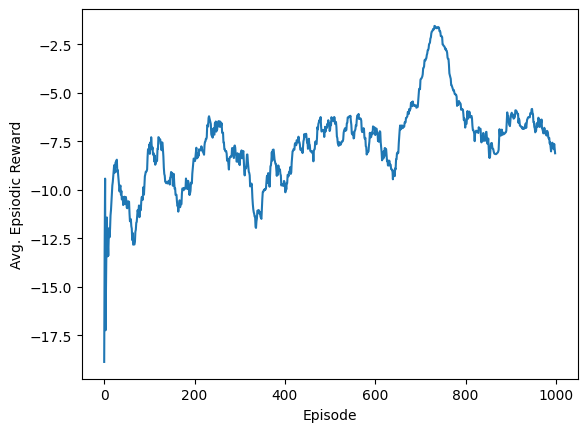

ValueError: x and y can be no greater than 2D, but have shapes (4000,) and (4000, 1, 1000)

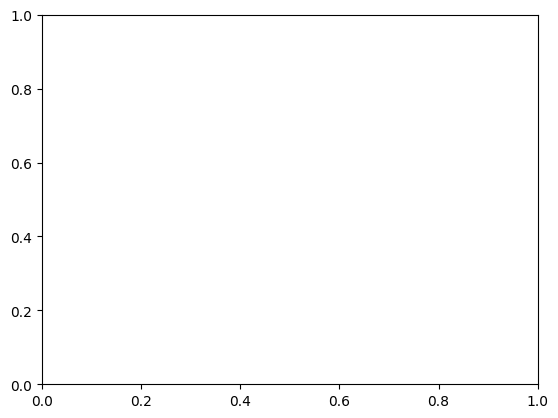

In [18]:
# Initial controller gain
Bj = np.array(Bd @ (-1*Kp)) 
A1 = Ad.T + Bj.T 
P = dlyap(A1, -Q)
K0 = P@Bj
# P = np.array([[-5.60388195e+02,  1.85873971e+02, -3.35420000e+02, -5.03729674e+00],
#                [ 1.85873971e+02, -2.01982759e+03,  4.26409397e+02, -3.23571106e+01],
#                [-3.35420000e+02,  4.26409397e+02, -1.14986282e+04, -1.02322121e+02],
#                [-5.03729674e+00, -3.23571106e+01, -1.02322121e+02, -4.55606248e+02]])
# Bj  = np.array([[0,0,0,0], [0,0,0,0], [-0.49590136/env.M, 1.14546156/env.M, -35.69758159/env.M, 11.83173935/env.M], [0.49590136/env.m, -1.14546156/env.m, 35.69758159/env.m, -11.83173935/env.m]])  
K = np.zeros([2*env.n, 2*env.n, total_episodes])
K[0:2*env.n,0:2*env.n,0] = K0
umin = 0.02
umax = 1
alpha = 5.0
s = []  # number of tau_s

# Reward list
ep_reward_list = np.zeros([4000, 1, total_episodes])  
ep_reward_list1 = []
avg_reward_list = []

#  Cost function 
ep_Jval_list = np.zeros([total_episodes, 1])

#  Action and state 
ep_Action_list = np.zeros([4000, env.r, total_episodes])
ep_State_list = np.zeros([4000, 2*env.n, total_episodes])
ep_AdState_list = np.zeros([4000, 2*env.n, total_episodes])  # Adjoint state
dj_dk = np.zeros([2*env.n, 2*env.n, total_episodes])  # Gradient

for ep in range(0, total_episodes-1):
    prev_state = env.reset()
    episodic_reward = 0
    env.K = K[0:2*env.n,0:2*env.n,ep]
    nt = len(env.t)
    #print(env.K)
    for time in range(0,nt-10):
        env.time_current = time
        tf_prev_state = tf.expand_dims(tf.convert_to_tensor(prev_state), 0)
        action = policy(tf_prev_state, ou_noise)
        #print(action)
        # Action List
        state, reward, done, info = env.step(action)
        #print(action)
        buffer.record((prev_state, np.squeeze(action), reward, state))
        episodic_reward += reward
        # Reward list
        buffer.learn()
        update_target(target_actor.variables, actor_model.variables, tau)
        update_target(target_critic.variables, critic_model.variables, tau)
        prev_state = state
        
    ep_Action_list[0:nt, :, ep] = np.squeeze(env.U)
    ep_State_list[0:nt, :, ep] = env.state
    ep_reward_list[0:nt, :, ep] = env.Re
    
    ep_Jval_list[ep, :] = np.array([env.J_val])
    ep_reward_list1.append(episodic_reward)
    avg_reward = np.mean(ep_reward_list1[-40:])
    avg_reward_list.append(avg_reward)
    print("Episode * {} * Reward is ==> {} * J_value is ==> {}".format(ep, episodic_reward, env.J_val))
        

    # Adjoint State 
    s.append([])
    for time in range(0,nt-10):
        i = nt-11-time
        #print(i)
        xn = np.array([ep_State_list[i,:,ep]]).T
        val = ((xn.T)@env.K)@(xn)
        #print(val)
        if(val[0]==0):
            pn = np.array([ep_AdState_list[i,:,ep]]).T
            s[ep].append(i)
            d_ptau = ((umin-umax)*((pn.T@ Bj)@xn))*((env.K + env.K.T)@xn)      #1*(1*1)*((n*n)@(n*1))  #############
            #d_ptau = (d_ptau1[0,0]*xn)      #1*(1*1)*((n*n)@(n*1))  #############
            #print(d_ptau)
            pnb1 = pn + d_ptau  # (n*1)
            ep_AdState_list[i-1,:,ep] = pnb1.T
        else:
            if(val[0] < 0.001 and val[0] > -0.001):
                s[ep].append(i)
            if(val[0]>=0):
                va = umin
            else:
                va = umax
            pn = np.array([ep_AdState_list[i,:,ep]]).T
            F = env.Q@xn 
            S = -va*(Bj.T)
            pnb1 = (-Ad.T @ pn) + (S @ pn) + (F)
            ep_AdState_list[i-1,:,ep] = pnb1.T
            #print(p[i-1,:,id]                      
                                  
            #F = env.Q@xn
            #S = -va*(Bj.T)      
            #k1 = -env.dt*(-env.A.T@pn + S@pn + F)             ##-G@pn-val*B.T@pn+Q@(e[id].T)
            #k2 = -env.dt*(-env.A.T@(pn +0.5*k1)+ S@(pn +0.5*k1)+ F)
            #k3 = -env.dt*(-env.A.T@(pn +0.5*k2)+ S@(pn +0.5*k2)+ F)
            #k4 = -env.dt*(-env.A.T@(pn +k3)+ S@(pn +k3)+ F)
            #pnb1 = pn + (k1 + 2*k2 + 2*k3 + k4)/6
            
            #print(p[i-1,:,id])
        del xn, val, pn, pnb1, i
    
    # Evaluate dj/dk
    sum = dj_dk[0:2*env.n,0:2*env.n,ep]
    print(len(s[ep]))
    if(len(s[ep])>0):
        for j in s[ep]:
            xn = np.array([ep_State_list[j,:,ep]]).T
            pn = np.array([ep_AdState_list[j,:,ep]]).T
            sum = sum +  -1*(umin-umax)*((pn.T@Bj)@xn)*(xn@xn.T)
        #print(sum)
        dj_dk[0:2*env.n,0:2*env.n,ep] = sum
        # Update K 
        K[0:2*env.n,0:2*env.n,ep+1] = K[0:2*env.n,0:2*env.n,ep]  - alpha*dj_dk[0:2*env.n,0:2*env.n,ep]
    else:
        print(np.linalg.norm(dj_dk[0:2*env.n,0:2*env.n,ep]))
    #break
    
plt.plot(avg_reward_list)
plt.xlabel("Episode")
plt.ylabel("Avg. Epsiodic Reward")
plt.show()
plt.plot(ep_reward_list)
plt.xlabel("Episode")
plt.ylabel("Epsiodic Reward")
plt.show()

np.savetxt("8_story_PG.txt",ep_reward_list.flatten())
np.savetxt("8_story_PG_avg.txt",avg_reward_list.flatten())

# Save the weights
# actor_model.save_weights("8story_actor_DDPG_PG.h5")
# critic_model.save_weights("8story_critic_DDPG_PG.h5")

# target_actor.save_weights("8story_target_actor_DDPG_PG.h5")
# target_critic.save_weights("8story_target_critic_DDPG_PG.h5")
    

In [58]:
np.savetxt("8_story_PG.txt",ep_reward_list.flatten())
np.savetxt("8_story_PG_avg.txt",avg_reward_list)
np.savetxt("8story_ep_Jval_list_PG.txt",ep_Jval_list)
np.save('8story_ep_Action_list_PG.npy', ep_Action_list)
np.save('8story_ep_State_list_PG.npy', ep_State_list)
np.save('8story_ep_reward_list_PG.npy', ep_reward_list)   


In [35]:
J = np.loadtxt("8story_ep_Jval_list_PG.txt",float)
plt.plot(J)

FileNotFoundError: 8story_ep_Jval_list_PG.txt not found.

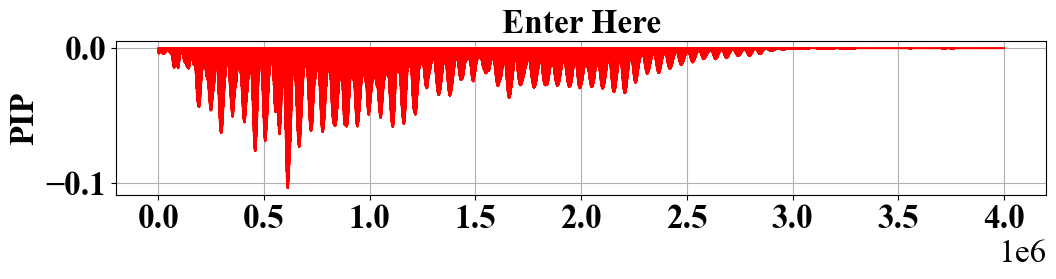

In [33]:
# import numpy as np
# reward = np.loadtxt("8_story_PG.txt",float)
# #avg_reward = np.savetxt("8_story_PG_avg.txt",float)
# #J = np.loadtxt(" .txt",float)

# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['font.size'] = 24

# figure1=plt.figure(figsize = (12, 2))
 
# #plt.plot(avg_reward, use_line_collection = True, linefmt='blue',label = "Average Reward")
# plt.plot(reward, 'r',label = "Episodic Reward")
# plt.ylabel('PIP', fontweight='bold');
# plt.title('Enter Here', fontweight='bold',fontsize=24)
# plt.grid(True);  
# plt.xticks(fontweight='bold'); plt.yticks(fontweight='bold');
# figure1.savefig('Reward_8Story.pdf',format='pdf',dpi=600,bbox_inches='tight')

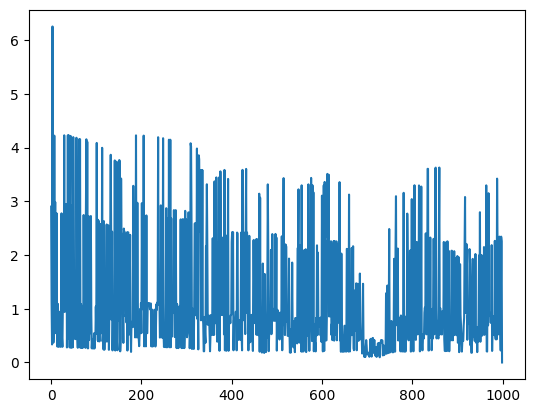

In [39]:
plt.plot(ep_Jval_list)

In [ ]:
[[28.71038861]
 [ 6.3833381 ]
 [17.07689431]
 [ 6.61271192]
 [ 3.12240593]
 [ 1.69320704]
 [ 6.13396419]
 [ 2.64840048]
 [20.00917642]
 [ 3.45692565]] [[1.10195739]
 [0.9118723 ]
 [0.79025596]
 [0.41580607]
 [0.36100668]
 [0.34328642]
 [0.58049981]
 [0.5181395 ]
 [1.41726984]
 [0.72252399]]

In [34]:
# Save the weights
actor_model.save_weights("8story_actor_DDPG_PG_G0p001T0p9.h5")
critic_model.save_weights("8story_critic_DDPG_PG_G0p001T0p9.h5")

target_actor.save_weights("8story_target_actor_DDPG_PG_G0p001T0p9.h5")
target_critic.save_weights("8story_target_critic_DDPG_PG_G0p001T0p9.h5")

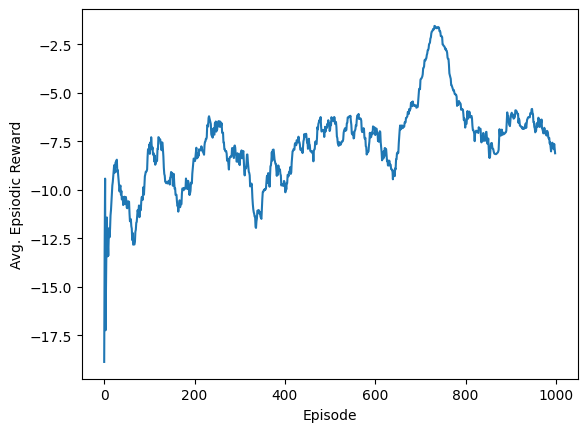

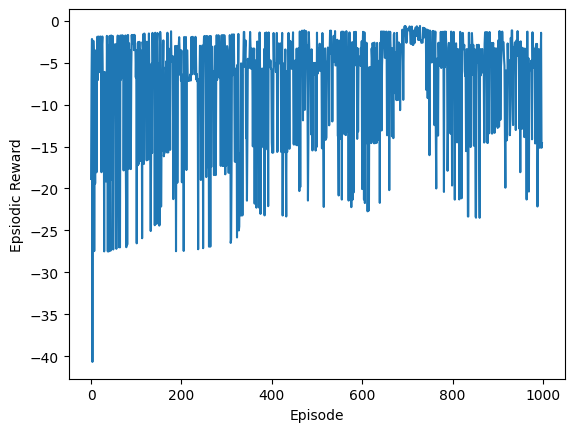

In [50]:
plt.plot(avg_reward_list)
plt.xlabel("Episode")
plt.ylabel("Avg. Epsiodic Reward")
plt.show()
plt.plot(np.squeeze(ep_reward_list1))
plt.xlabel("Episode")
plt.ylabel("Epsiodic Reward")
plt.show()

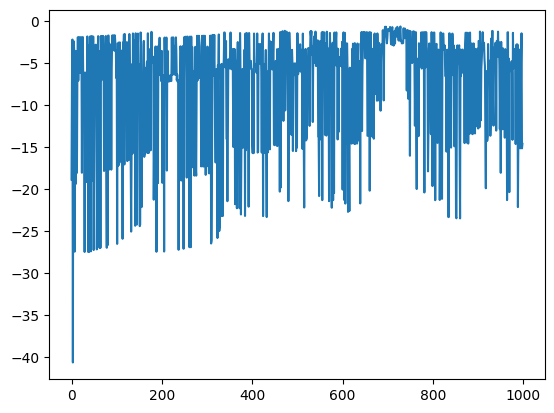

In [49]:
plt.plot(np.squeeze(ep_reward_list1))

In [16]:
del actor_model 
del critic_model

del target_actor 
del target_critic 
del policy

NameError: name 'actor_model' is not defined

In [17]:
actor_model = get_actor()
critic_model = get_critic()

target_actor = get_actor()
target_critic = get_critic()

In [18]:
actor_model.load_weights("8story_actor_DDPG_PG_G0p001T0p9.h5")
critic_model.load_weights("8story_critic_DDPG_PG_G0p001T0p9.h5")

target_actor.load_weights("8story_target_actor_DDPG_PG_G0p001T0p9.h5")
target_critic.save_weights("8story_target_critic_DDPG_PG_G0p001T0p9.h5")

In [19]:
 def policy(state):
    sampled_actions = tf.squeeze(target_actor(state))
   
    sampled_actions = sampled_actions.numpy() 
    legal_action = np.clip(sampled_actions, lower_bound, upper_bound)

    return [np.squeeze(legal_action)]

In [55]:
# Time series analysis
xd = np.zeros((4050,2*n,60))
yd = np.zeros((4050,n,60))
Action = np.zeros([4050, r, 60])
Action1 = np.zeros([4050, r, 60])
Ed = np.zeros([4050, 1, 60])
Eo = np.zeros([4050, 1, 60])
Ep = np.zeros([4050, 1, 60])
ep = 1000-1
for i in range(1, 61):
    prev_state = env.reset()
    if i < 10:
        f = "la"+"%02d" % i  + ".dat"
    else:
        f = "la"+"%02d" % i  + ".dat"
    print(f)
    xacc = (np.array(np.loadtxt(f)).flatten())/100
    # Time series for ground motion
    dt = GMdt[i-1]
    env.dt = dt
    #print(dt)
    tend = dt*len(xacc)
    env.dt = dt
    #print(dt)
    tend = dt*len(xacc)
    t = np.arange(0, tend, dt)
    env.t = t
    #plt.figure()
    #plt.plot(t,xacc)
    env.xacc = xacc
    episodic_reward = 0
    nt = len(env.t)
    env.time_current = 0
    env.state = np.zeros([nt, 2*env.n]) # states (ys,ysdot,yt,ytdot)
    env.U = np.zeros([nt, env.r]) # Control force (action)
    env.Re = np.zeros([nt, 1]) # Reward
    env.Volt = np.zeros([nt, 1])
    for time in range(0,nt-10):
        env.time_current = time
        tf_prev_state = tf.expand_dims(tf.convert_to_tensor(prev_state), 0)
        action = policy(tf_prev_state)
        #print(action)
        # Action List
        state, reward, done, info = env.step(action)
        #print(action)
        episodic_reward += reward
        # Reward list
        prev_state = state
        
    #print("Episode * {} * Reward is ==> {}".format(ep, episodic_reward))
    print("Episode * {} * J_value is ==> {}".format(ep, env.J_val)) 
    xd[0:nt, :, i-1] = env.state
    Action[0:nt, :, i-1] = np.squeeze(env.U)
  
    for tkk in range(0,nt-1):
        En1 = 0.5*((np.array([xd[tkk, :, i-1]]) @ Q)@ (np.array([xd[tkk, :, i-1]])).T)
        Ed[tkk,:,i-1] = En1
        En2 = 0.5*((np.array([xo[tkk, :, i-1]]) @ Q)@ (np.array([xo[tkk, :, i-1]])).T)
        Eo[tkk,:,i-1] = En2
        En3 = 0.5*((np.array([xp[tkk, :, i-1]]) @ Q)@ (np.array([xp[tkk, :, i-1]])).T)
        Ep[tkk,:,i-1] = En3
        u1 = (-1*Kp)@np.array([xd[tkk, :, i-1]]).T
        Action1[tkk, :, i-1] = u1.T
        y1 = (Cd @ np.array([xd[tkk,:,i-1]]).T) + (Dd@np.array([Action[tkk, :, i-1]]).T)
        yd[tkk, :, i-1] = y1[0:8].T

la01.dat
Episode * 999 * J_value is ==> [[4.26540627]]
la02.dat
Episode * 999 * J_value is ==> [[1.24622118]]
la03.dat
Episode * 999 * J_value is ==> [[2.69808206]]
la04.dat
Episode * 999 * J_value is ==> [[1.06463324]]
la05.dat
Episode * 999 * J_value is ==> [[0.57518602]]
la06.dat
Episode * 999 * J_value is ==> [[0.32429237]]
la07.dat
Episode * 999 * J_value is ==> [[1.09223284]]
la08.dat
Episode * 999 * J_value is ==> [[0.49628468]]
la09.dat
Episode * 999 * J_value is ==> [[3.15490975]]
la10.dat
Episode * 999 * J_value is ==> [[0.64623518]]
la11.dat
Episode * 999 * J_value is ==> [[2.14996617]]
la12.dat
Episode * 999 * J_value is ==> [[0.56865829]]
la13.dat
Episode * 999 * J_value is ==> [[1.33205356]]
la14.dat
Episode * 999 * J_value is ==> [[0.92979156]]
la15.dat
Episode * 999 * J_value is ==> [[1.85684814]]
la16.dat
Episode * 999 * J_value is ==> [[3.94747533]]
la17.dat
Episode * 999 * J_value is ==> [[3.7201042]]
la18.dat
Episode * 999 * J_value is ==> [[2.28106852]]
la19.dat
Ep

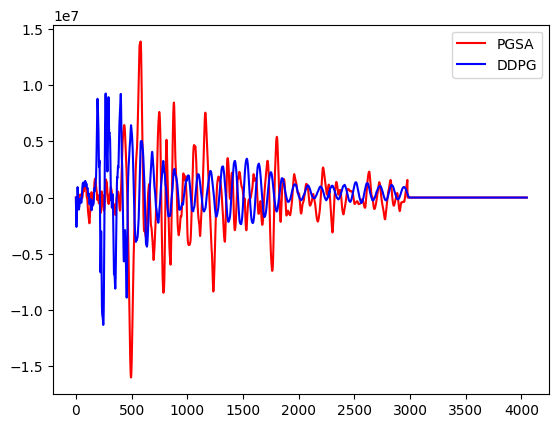

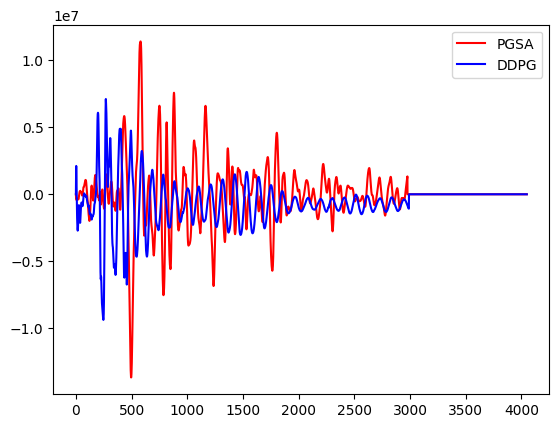

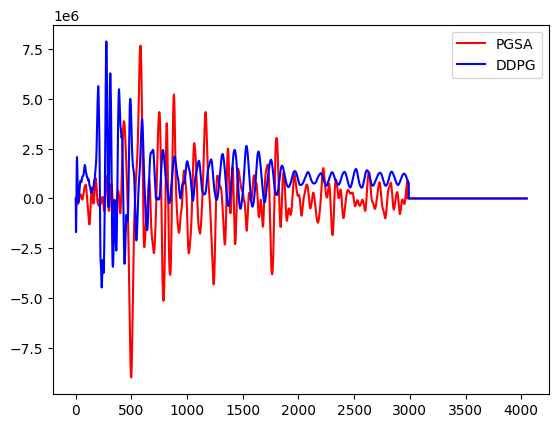

In [47]:
#  Control force
plt.figure()
plt.plot(U[:,0, 15],'r',label='PGSA')
#plt.plot(env.amplitude,label="path")
plt.plot(Action1[:,0, 13],'b',label='DDPG')
plt.legend()

plt.figure()
plt.plot(U[:,1, 15],'r',label='PGSA')
#plt.plot(env.amplitude,label="path")
plt.plot(Action1[:,1, 13],'b',label='DDPG')
plt.legend()

plt.figure()
plt.plot(U[:,2, 15],'r',label='PGSA')
#plt.plot(env.amplitude,label="path")
plt.plot(Action1[:,2, 13],'b',label='DDPG')
plt.legend()

In [48]:
input = np.array([Action1[:,0, 13], Action1[:,1, 13], Action1[:,2, 13]])
print(input.T.shape)
result=np.savetxt('Force1_Linear.txt', input.T, delimiter=' ')
print(result)

(4050, 3)
None


In [21]:
# Peak responses
PDdg = np.zeros([len(GMdt), 1])
PVdg = np.zeros([len(GMdt), 1])
PAdg = np.zeros([len(GMdt), 1])
for ijk in range(0,len(GMdt)):
    PDdg[ijk, :] = max(np.array([max(np.absolute(xd[:,0,ijk])), max(np.absolute(xd[:,1,ijk])), max(np.absolute(xd[:,2,ijk])), max(np.absolute(xd[:,3,ijk])), max(np.absolute(xd[:,4,ijk])), max(np.absolute(xd[:,5,ijk])), max(np.absolute(xd[:,6,ijk])), max(np.absolute(xd[:,7,ijk]))]))
    PVdg[ijk, :] = max(np.array([max(np.absolute(xd[:,8,ijk])), max(np.absolute(xd[:,9,ijk])), max(np.absolute(xd[:,10,ijk])), max(np.absolute(xd[:,11,ijk])), max(np.absolute(xd[:,12,ijk])), max(np.absolute(xd[:,13,ijk])), max(np.absolute(xd[:,14,ijk])), max(np.absolute(xd[:,15,ijk]))]))
    PAdg[ijk, :] = max(np.array([max(np.absolute(yd[:,0,ijk])), max(np.absolute(yd[:,1,ijk])), max(np.absolute(yd[:,2,ijk])), max(np.absolute(yd[:,3,ijk])), max(np.absolute(yd[:,4,ijk])), max(np.absolute(yd[:,5,ijk])), max(np.absolute(yd[:,6,ijk])), max(np.absolute(yd[:,7,ijk]))]))  

In [22]:
# Mean and Standard deviation
import numpy as np
import scipy.stats as st

# create 95% confidence interval
print(np.mean(PDdg)*0.5)
print(np.mean(PVdg))
print(np.mean(PAdg))
print(st.t.interval(confidence=0.95, df=len(PDdg)-1,
              loc=np.mean(PDdg),
              scale=st.sem(PDdg)))
print(st.t.interval(confidence=0.95, df=len(PVdg)-1,
              loc=np.mean(PVdg),
              scale=st.sem(PVdg)))
print(st.t.interval(confidence=0.95, df=len(PAdg)-1,
              loc=np.mean(PAdg),
              scale=st.sem(PAdg)))

0.11372571948186597
1.314954971056676
18.214723128869743
(array([0.17999285]), array([0.27491003]))
(array([1.05434979]), array([1.57556015]))
(array([17.66788757]), array([18.76155868]))


In [57]:
#  Performance indices
J1rd = np.zeros([len(GMdt), n])
J2rd = np.zeros([len(GMdt), n])
J3rd = np.zeros([len(GMdt), n])
J4rd = np.zeros([len(GMdt), 1])
J4rp = np.zeros([len(GMdt), 1])
#  Variation along height
J1d = np.zeros([3, n])
J2d = np.zeros([3, n])
J3d = np.zeros([3, n])

In [58]:
 for ijk in range(0,len(GMdt)):
        J4rd[ijk, :] = max(np.absolute(Ed[:,0,ijk]))/max(np.absolute(Eo[:,0,ijk]))
        J4rp[ijk, :] = max(np.absolute(Ep[:,0,ijk]))/max(np.absolute(Eo[:,0,ijk]))
        for i in range(0,n):
            J1rd[ijk, i] = max(np.absolute(xd[:,i,ijk]))/max(np.absolute(xo[:,i,ijk]))
            J2rd[ijk, i] = max(np.absolute(xd[:,n+i,ijk]))/max(np.absolute(xo[:,n+i,ijk]))
            J3rd[ijk, i] = max(np.absolute(yd[:,i,ijk]))/max(np.absolute(yo[:,i,ijk]))
del i, ijk
for i in range(0,n):
        J1d[0, i] = np.mean(J1rd[0:20, i])
        J1d[1, i] = np.mean(J1rd[20:40, i])
        J1d[2, i] = np.mean(J1rd[40:60, i])
        J2d[0, i] = np.mean(J2rd[0:20, i])
        J2d[1, i] = np.mean(J2rd[20:40, i])
        J2d[2, i] = np.mean(J2rd[40:60, i])
        J3d[0, i] = np.mean(J3rd[0:20, i])
        J3d[1, i] = np.mean(J3rd[20:40, i])
        J3d[2, i] = np.mean(J3rd[40:60, i])

In [62]:
np.mean(J4rd)*0.5

0.5194310304028489

In [61]:
np.mean(J4rp)

0.38876149495533074

In [ ]:
plt.plot(ep_State_list[0:nt, 0, 992])
np.save('Disp0_DDPG_PG_CW.npy', ep_State_list[0:nt, 0, 992])
np.save('Disp7_DDPG_PG_CW.npy', ep_State_list[0:nt, 7, 992])
np.save('Vel0_DDPG_PG_CW.npy', ep_State_list[0:nt, 8, 992])
np.save('Vel7_DDPG_PG_CW.npy', ep_State_list[0:nt, 15, 992])

In [ ]:
Bj.shape

In [ ]:
plt.plot(ep_Action_list[:, :, 499])

In [ ]:
plt.plot(np.squeeze(ep_reward_list1))

In [ ]:
plt.plot(ep_Jval_list)

In [ ]:
plt.plot(ep_Action_list[:,0])
plt.plot(ep_Action_list[:,499])

In [ ]:
plt.plot(env.Volt)

In [ ]:
plt.plot(actions[0])

In [ ]:
plt.plot(actions[16])

In [ ]:
plt.plot(actions[99])

In [ ]:
plt.plot(actions[498])

In [ ]:
# Save the weights
actor_model.save_weights("qcar_actor.h5")
critic_model.save_weights("qcar_critic.h5")

target_actor.save_weights("qcar_target_actor.h5")
target_critic.save_weights("qcar_target_critic.h5")

In [ ]:
plt.plot(ep_reward_list)


In [ ]:

plt.plot(values[30][0][0],label='episode 100')
plt.plot(values[99][0][0],label='episode ')
 
plt.legend()
plt.show()

In [ ]:
plt.plot(env.hr)

In [ ]:
plt.plot(J_values)

In [ ]:
plt.plot(ep_reward_list)


In [ ]:
plt.plot(actions[149])

In [ ]:
plt.plot(actions[145])

In [ ]:
plt.plot(actions[141])